In [11]:
import os
import numpy as np
from scipy.interpolate import RectBivariateSpline
from pandas import read_csv
import matplotlib.pyplot as plt
import yaml
from scipy.integrate import cumtrapz
from ase.units import kB, GPa
root = os.getcwd()

In [12]:
#%matplotlib qt5
def calc_rs():
    with open("ti_spring_300.yaml", "r") as f:
        y = yaml.safe_load(f)

    T0 = y["T"]
    G0 = y["G"]
    rs = read_csv("ti_rs.csv")
    n = int(len(rs) / 2)
    forward = rs[:n]
    backward = rs[n:][::-1]
    backward.reset_index(inplace=True)
    l = forward["lambda"]
    H1 = forward["enthalpy"]
    H2 = backward["enthalpy"]
    T = T0/l
    w = (cumtrapz(H1,l,initial=0) + cumtrapz(H2,l,initial=0))*0.5
    G = (G0 + 1.5*kB*T0*np.log(l) + w)/l
    os.chdir(root)
    return T, G

T, G = calc_rs()

Text(22.097222222222214, 0.5, 'Free energy (eV/atom)')

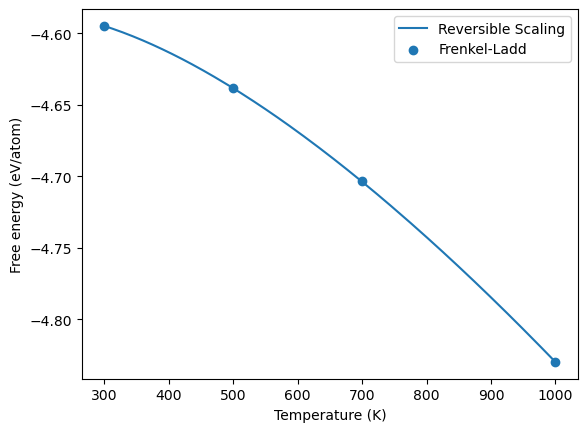

In [14]:
plt.plot(T, G, label="Reversible Scaling")
plt.scatter([300, 500, 700, 1000], [-4.5948, -4.6383, -4.7035, -4.8295], label="Frenkel-Ladd")
plt.legend()
plt.xlabel("Temperature (K)")
plt.ylabel("Free energy (eV/atom)")
plt.savefig("TI.pdf")